上节我们了解了可以直接利用 tesserocr来识别简单的图形验证码 。近几年出现了一些新型验证码，
其巾比较有代表性的就是极验验证码 ，它需要拖动拼合滑块才可以完成验证，相对图形验证码来说识
别难度上升了几个等级。 本节将讲解极验验证码的识别过程。

# 1 . 本节目标
我们的目标是用程序来识别并通过极验验证码的验证，包括分析识别思路、识别缺 口位置、生成
滑块拖动路径、模拟实现滑块拼合通过验证等步骤。
# 2. 准备工作
本次我们使用的 Python 库是 Selenium ，浏览器为 Chrome。 请确保已经正确安装 Seleni1
Chro me 浏览器，并配置 ChromeDriver ，相关流程可以参考第 l 章的说明 。
# 3 . 了解极验验证码
极验验证码官网为： http://www.geetest.com/。 它是一个专注于提供验证安全的系统，主要验证方
式是拖动滑块拼合图像 。 若图像完全拼合， 则验证成功，即表单成功提交 ， 否则需要重新验证

# 4 . 极验验证码特点
极验验证码相较于图形验证码来说识别难度更大。 对于极验验证码 3.0 版本，我们首先点击按钮
进行智能验证。 如果验证不通过，则会弹出滑动验证的窗口，拖动滑块拼合图像进行验证。 之后三个
加密参数会生戚，通过表单提交到后台，后台还会进行一次验证。

# 5 识别思路
对于应用了极验验证码的网站如果我们直接模拟表单提交，加密参数的构造是个问题，需要分
析其加密和校验逻辑，相对烦琐 。 所以我们采用直接模拟浏览器动作的方式来完成验证。 在 Python中，我们可以使用 Se lenium 来完全模拟人的行为的方式来完成验证，此验证成本相比直接去识别加密算法少很多 。

首先找到一个带有极验验证的网站，如极验官方后台，链接为 https://account.geetest.com/login。
在登录按钮上方有一个极验验证按钮

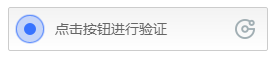

此按钮为智能验证按钮 。 一般来说，如果是同一个会话， 一段时间内第二次点击会直接通过验证。
如果智能识别不通过，则会弹出滑动验证窗口，我们要拖动滑块拼合图像完成二步验证， 如图 8-10
所示 。